 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
folderpath = Path('Resources')

# Reading whale returns
csvpath = folderpath / Path('whale_returns.csv')
whale_returns = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
csvpath = folderpath / Path('algo_returns.csv')
algo_returns = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
csvpath = folderpath / Path('sp_tsx_history.csv')
sp_tsx_history = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_history['Close']  = sp_tsx_history['Close'].str.replace('[\$,]','',regex=True).astype(float)

sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [12]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_history.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Drop nulls
sp_tsx_returns = sp_tsx_returns.dropna()
sp_tsx_returns.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.columns = ['S&P TSX 60']
sp_tsx_returns.dtypes

S&P TSX 60    float64
dtype: object

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis='columns', join='inner')
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

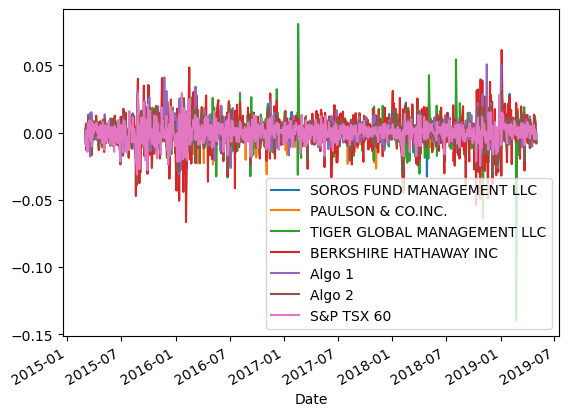

In [16]:
# Plot daily returns of all portfolios
all_returns.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

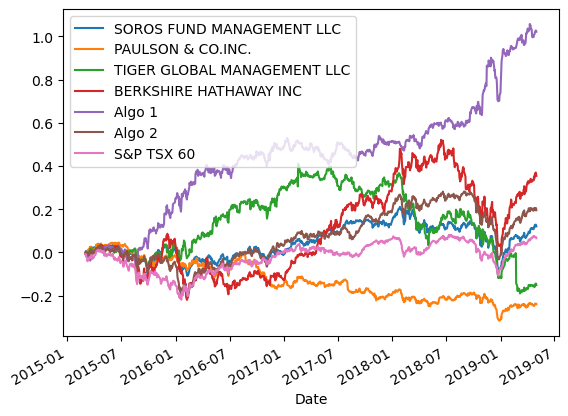

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod() - 1
cumulative_returns
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

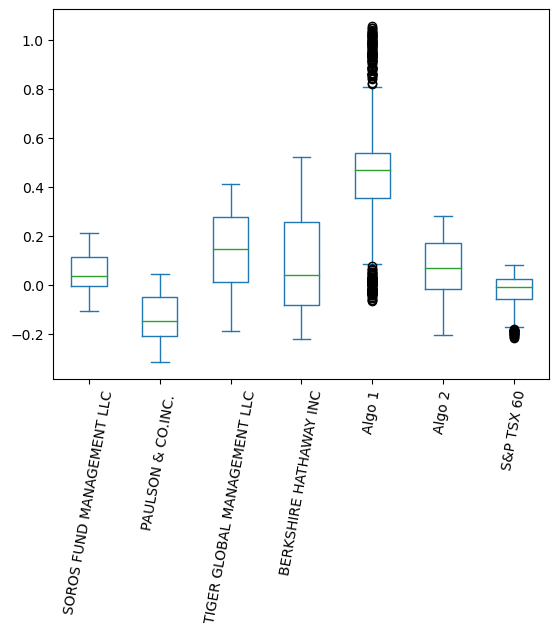

In [18]:
# Box plot to visually show risk
cumulative_returns.plot.box(rot=80)

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx60_std = daily_std['S&P TSX 60']
# Determine whicfh portfolios are riskier than the S&P TSX 60
riskierthan_tsx60 = {}
for strat in daily_std.index:
    if daily_std[strat] > tsx60_std:
        riskierthan_tsx60[strat] = daily_std[strat]

print(f"Portfolios riskier than S&P TSX 60: {list(riskierthan_tsx60.keys())}")

Portfolios riskier than S&P TSX 60: ['SOROS FUND MANAGEMENT LLC', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2']


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
# Annualized Standard Deviation = Daily Standard Deviation * Square Root (Trading Days)
trading_days = 252
annual_std = daily_std * (trading_days ** (1/2))
print(f"Yearly Trading Days: {trading_days}")
annual_std

Yearly Trading Days: 252


SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [35]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_21d = all_returns.rolling(window=21).std()
std_21d = std_21d.dropna()
std_21d.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.006583
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295


### Calculate and plot the correlation

<AxesSubplot:>

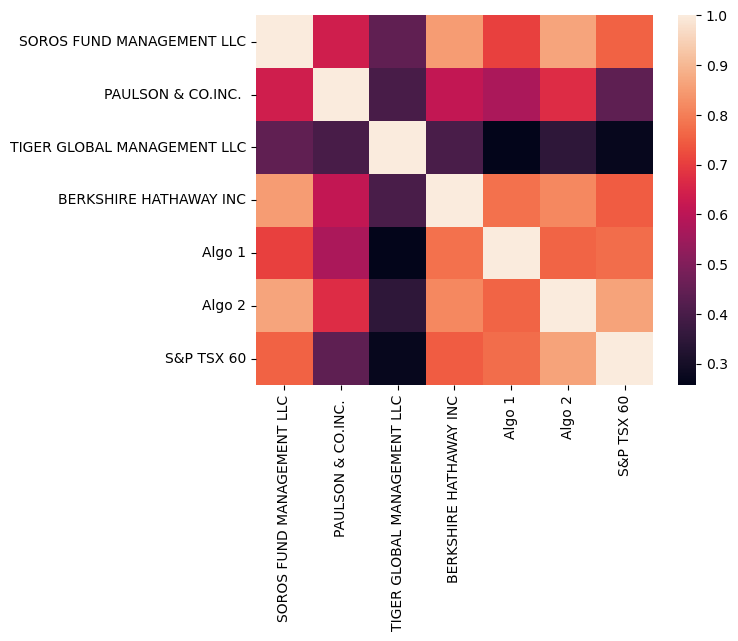

In [39]:
# Calculate the correlation
correlation = std_21d.corr()

# Display de correlation matrix
# Import Seaborn library
import seaborn as sns
# Use heatmap to visualize correlation matrix
sns.heatmap(correlation)

In [111]:
# Select highest portfolio with highest correlation to S&P TSX 60
tsx60_corr = correlation['S&P TSX 60'].sort_values().iloc[:-1]
tsx60_closest = [tsx60_corr.idxmax(), tsx60_corr[-1]]
tsx60_closest

['Algo 2', 0.8613222904914283]

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [144]:
# Calculate covariance of a single portfolio
# Using all_returns for daily returns of portfolio
covariance = all_returns[tsx60_closest[0]].rolling(21).cov(all_returns['S&P TSX 60']).dropna()
# Calculate variance of S&P TSX
variance = all_returns['S&P TSX 60'].rolling(21).var().dropna()
# Computing beta
portfolio_beta = (covariance / variance).dropna()

print(f"{tsx60_closest[0]} - TSX 60:")
print(f'Covariance: {covariance}')
print(f'Variance: {variance}')
print(f'Beta: {portfolio_beta}')

Algo 2 - TSX 60:
Covariance: Date
2015-03-31    0.000031
2015-04-01    0.000031
2015-04-02    0.000033
2015-04-06    0.000034
2015-04-07    0.000027
                ...   
2019-04-25    0.000011
2019-04-26    0.000011
2019-04-29    0.000010
2019-04-30    0.000012
2019-05-01    0.000012
Length: 1009, dtype: float64
Variance: Date
2015-03-31    0.000043
2015-04-01    0.000041
2015-04-02    0.000042
2015-04-06    0.000044
2015-04-07    0.000040
                ...   
2019-04-25    0.000011
2019-04-26    0.000011
2019-04-29    0.000011
2019-04-30    0.000010
2019-05-01    0.000010
Name: S&P TSX 60, Length: 1009, dtype: float64
Beta: Date
2015-03-31    0.710693
2015-04-01    0.753997
2015-04-02    0.770667
2015-04-06    0.778460
2015-04-07    0.675297
                ...   
2019-04-25    0.984012
2019-04-26    0.961270
2019-04-29    0.925981
2019-04-30    1.102528
2019-05-01    1.174038
Length: 1009, dtype: float64


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

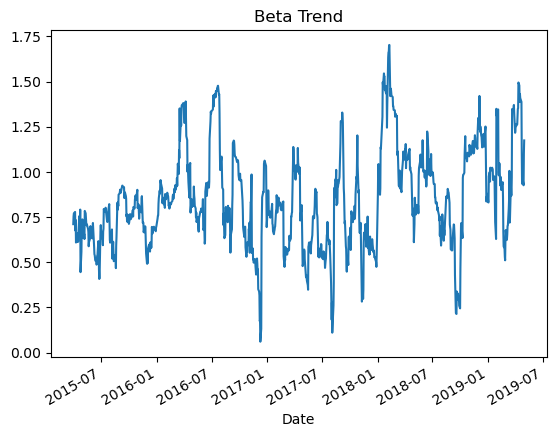

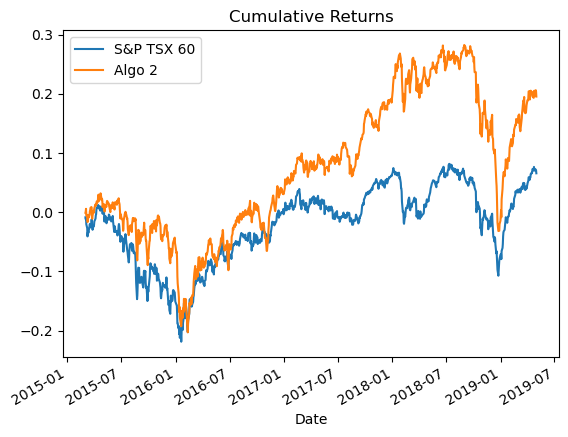

In [149]:
# Plot beta trend
portfolio_beta.plot(title='Beta Trend')
cumulative_returns[['S&P TSX 60', 'Algo 2']].plot(title='Cumulative Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

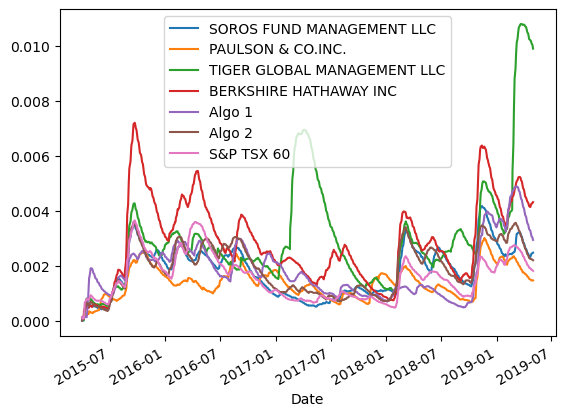

In [157]:
# Use `ewm` to calculate the rolling window
ewmstd = std_21d.ewm(halflife=21).std()
ewmstd.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [160]:
# Annualized Sharpe Ratios
sharpe_ratios = (
    all_returns.mean() * trading_days / 
    (all_returns.std() * trading_days**0.5)
)

sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:xlabel='Date'>

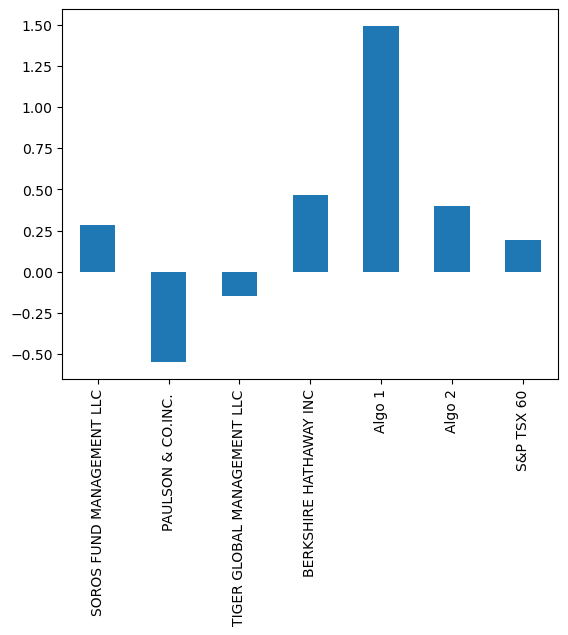

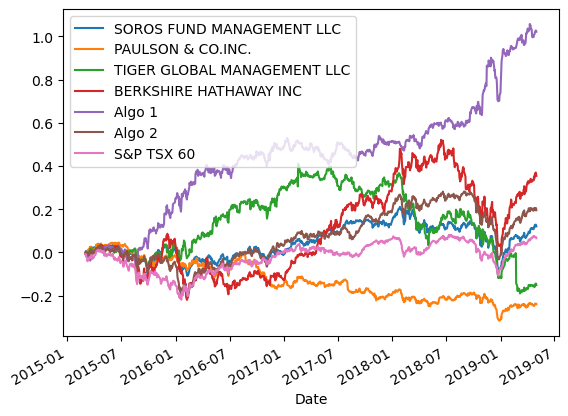

In [165]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()
cumulative_returns.plot()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The algorithmic strategies, especieally Algo 1, outperform both the market (S&P TSX 60) and the whale portfolios because it generates greater cumulative returns on top of having a higher Sharpe ratio, meaning a better risk-adjusted return.

That being said, Berkshire Hathaway has a great risk-adjusted return compared to the market and other portfolios, especially for a strategy that is not primarily actively traded.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [173]:
# Get stock data from yahoo finance (because google finance is depracated)
import yfinance as yf

In [174]:
# Reading data from 1st stock
tsla = yf.download('TSLA', period='1y')
tsla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-16,331.500000,331.660004,307.283325,308.973328,308.973328,82771500
2021-12-17,304.923340,320.220001,303.013336,310.856659,310.856659,100437300
2021-12-20,303.566681,307.230011,297.796661,299.980011,299.980011,56480100
2021-12-21,305.623322,313.166656,295.373322,312.843323,312.843323,71517900
2021-12-22,321.886658,338.553345,319.016663,336.290009,336.290009,93634200


In [175]:
# Reading data from 2nd stock
spy = yf.download('SPY', period='1y')
spy.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-16,472.570007,472.869995,464.799988,466.450012,459.496887,116568600
2021-12-17,461.549988,464.739990,458.059998,459.869995,454.606476,135511600
2021-12-20,454.480011,455.399994,451.140015,454.980011,449.772491,107134800
2021-12-21,458.609985,463.209991,456.309998,463.059998,457.760010,69806300
2021-12-22,462.790009,467.809998,462.579987,467.690002,462.337006,58890200


In [180]:
# Reading data from 3rd stock
brka = yf.download('BRK-A', period='1y')
brka.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-16,447540.0,454550.0,444655.0,454550.0,454550.0,2200
2021-12-17,448850.0,449949.0,441200.0,443304.0,443304.0,2300
2021-12-20,438290.0,439949.0,434055.0,437445.0,437445.0,1800
2021-12-21,441315.0,445379.0,439385.0,443000.0,443000.0,1300
2021-12-22,441460.0,444588.0,440300.0,444588.0,444588.0,1200


In [192]:
# Combine all stocks in a single DataFrame
df_portfolio = pd.concat([tsla,spy,brka], axis=1, keys=['TSLA','SPY','BRK-A'])
df_portfolio.head()

TSLA                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2021-12-16  331.500000  331.660004  307.283325  308.973328  308.973328   
2021-12-17  304.923340  320.220001  303.013336  310.856659  310.856659   
2021-12-20  303.566681  307.230011  297.796661  299.980011  299.980011   
2021-12-21  305.623322  313.166656  295.373322  312.843323  312.843323   
2021-12-22  321.886658  338.553345  319.016663  336.290009  336.290009   

                              SPY                                      \
               Volume        Open        High         Low       Close   
Date                                                                    
2021-12-16   82771500  472.570007  472.869995  464.799988  466.450012   
2021-12-17  100437300  461.549988  464.739990  458.059998  459.869995   
2021-12-20   56480100  454.480011  455.399994  451.140015  454.980011   
2021-12-21   71517900  458.609985  463.209991  456.309998  463.059998   
2021-12-22   93634200  462.790009  467.809998  462.579987  467.690002   

                                      BRK-A                                \
             Adj Close     Volume      Open      High       Low     Close   
Date                                                                        
2021-12-16  459.496887  116568600  447540.0  454550.0  444655.0  454550.0   
2021-12-17  454.606476  135511600  448850.0  449949.0  441200.0  443304.0   
2021-12-20  449.772491  107134800  438290.0  439949.0  434055.0  437445.0   
2021-12-21  457.760010   69806300  441315.0  445379.0  439385.0  443000.0   
2021-12-22  462.337006   58890200  441460.0  444588.0  440300.0  444588.0   

                             
           Adj Close Volume  
Date                         
2021-12-16  454550.0   2200  
2021-12-17  443304.0   2300  
2021-12-20  437445.0   1800  
2021-12-21  443000.0   1300  
2021-12-22  444588.0   1200

In [193]:
# Reset Date index
df_portfolio = df_portfolio.reset_index()
df_portfolio.head()

Date        TSLA                                                  \
                    Open        High         Low       Close   Adj Close   
0 2021-12-16  331.500000  331.660004  307.283325  308.973328  308.973328   
1 2021-12-17  304.923340  320.220001  303.013336  310.856659  310.856659   
2 2021-12-20  303.566681  307.230011  297.796661  299.980011  299.980011   
3 2021-12-21  305.623322  313.166656  295.373322  312.843323  312.843323   
4 2021-12-22  321.886658  338.553345  319.016663  336.290009  336.290009   

                     SPY                                                  \
      Volume        Open        High         Low       Close   Adj Close   
0   82771500  472.570007  472.869995  464.799988  466.450012  459.496887   
1  100437300  461.549988  464.739990  458.059998  459.869995  454.606476   
2   56480100  454.480011  455.399994  451.140015  454.980011  449.772491   
3   71517900  458.609985  463.209991  456.309998  463.059998  457.760010   
4   93634200  462.790009  467.809998  462.579987  467.690002  462.337006   

                 BRK-A                                                 
      Volume      Open      High       Low     Close Adj Close Volume  
0  116568600  447540.0  454550.0  444655.0  454550.0  454550.0   2200  
1  135511600  448850.0  449949.0  441200.0  443304.0  443304.0   2300  
2  107134800  438290.0  439949.0  434055.0  437445.0  437445.0   1800  
3   69806300  441315.0  445379.0  439385.0  443000.0  443000.0   1300  
4   58890200  441460.0  444588.0  440300.0  444588.0  444588.0   1200

In [194]:
# Reorganize portfolio data by having a column per symbol (closing price)
df_portfolio_prices = df_portfolio.xs('Close', level=1, axis=1)
df_portfolio_prices.head()

,TSLA,SPY,BRK-A
0,308.973328,466.450012,454550.0
1,310.856659,459.869995,443304.0
2,299.980011,454.980011,437445.0
3,312.843323,463.059998,443000.0
4,336.290009,467.690002,444588.0


In [197]:
# Calculate daily returns
df_daily_returns = df_portfolio_prices.pct_change()
# Drop NAs
df_daily_returns = df_daily_returns.dropna()
# Display sample data
df_daily_returns.head()

,TSLA,SPY,BRK-A
1,0.006095,-0.014107,-0.024741
2,-0.034989,-0.010633,-0.013217
3,0.042881,0.017759,0.012699
4,0.074947,0.009999,0.003585
5,0.057619,0.006222,0.000148


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [38]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [39]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [40]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios


In [42]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!